In [2]:
import os
import numpy as np
import pandas as pd
import networkx as nx
import pickle as pkl

import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh

from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist

## Calculate distances for balanced clusters

In [2]:
nodes_in_cluster     = 1000
list_cluster_edges   = [1, 5, 10, 20, 50, 100, 200, 400, 600, 800, 999]
list_between_cluster = [1, 5, 10, 20, 50, 100, 200, 400, 600, 800, 1000]
list_eigvectors_no   = [2, 5, 10, 20, 40, 60, 80, 100]

all_between  = {}
all_cluster1 = {}
all_cluster2 = {}
        
for no_in_cluster_edges in list_cluster_edges:
    
    all_b  = {}
    all_c1 = {}
    all_c2 = {}
    for k in list_eigvectors_no:
        all_b[k]  = []
        all_c1[k] = []
        all_c2[k] = []
    
    for no_in_between_cluster_edges in list_between_cluster:
        
        print("=" * 100)
        print("No edges generated by node in cluster: {}".format(no_in_cluster_edges))
        print("No of edges drawn by each node in between clusters: {}".format(no_in_between_cluster_edges))
        print("-" * 100)
        
        k_between  = {}
        k_cluster1 = {}
        k_cluster2 = {}
        for k in list_eigvectors_no:
            k_between[k]  = []
            k_cluster1[k] = []
            k_cluster2[k] = []

        no_runs = 10
        # run it multiple times and average the data
        for _r in range(0, no_runs):
            print("run no. {} ...".format(_r))

            src = []
            dst = []
            
            for i in range(0, nodes_in_cluster):
                dsts = np.random.choice(np.delete(np.array(range(0, nodes_in_cluster)), i, None), size = no_in_cluster_edges, replace = False)
                for d in dsts:
                    src.append(i)
                    dst.append(d)

            for j in range(nodes_in_cluster, nodes_in_cluster * 2):
                dsts = np.random.choice(np.delete(np.array(range(nodes_in_cluster, nodes_in_cluster * 2)), j - nodes_in_cluster, None), size = no_in_cluster_edges, replace = False)
                for d in dsts:
                    src.append(j)
                    dst.append(d)

            inter_cluster_src = np.random.choice(np.array(range(0, nodes_in_cluster)), size = no_in_between_cluster_edges, replace = False)
            for _src in inter_cluster_src:
                inter_cluster_dst = np.random.choice(np.array(range(nodes_in_cluster, nodes_in_cluster * 2)), size = no_in_between_cluster_edges, replace = False)

                for _dst in inter_cluster_dst:
                    src.append(_src)
                    dst.append(_dst)

            # convert the src, dst to a data frame
            df = pd.DataFrame(list(zip(src, dst)), columns = ["src", "dst"])

            # get the eigenvectors
            graph = nx.from_pandas_edgelist(df, "src", "dst")
            laplacian = nx.normalized_laplacian_matrix(graph)
            try:
                eig_vals, eig_vecs = eigsh(laplacian, k = 101, which = "SM")
            except:
                print('tolerance required')
                eig_vals, eig_vecs = eigsh(laplacian, k = 101, which = "SM", tol = 1e-16)


            # get the cluster indexes
            v = []
            cluster1 = []
            cluster2 = []
            idx = 0
            for node in graph.nodes():
                if node < nodes_in_cluster: 
                    v.append('r')
                    cluster1.append(idx)
                else:
                    v.append('b')
                    cluster2.append(idx)

                idx += 1

            # get the distances
            for k in list_eigvectors_no:
                normed = eig_vecs[:, 1:k + 1]
                for iter in range(0, len(normed)):
                    n = np.linalg.norm(normed[iter], ord = 2)
                    for k_column in range(0, k):
                        normed[iter][k_column] = normed[iter][k_column] / n

                xa = []
                xb = []
                for iter in range(0, k):
                    xa.append(normed[cluster1, iter].mean())
                    xb.append(normed[cluster2, iter].mean())

                xa = np.array(xa).reshape(1, k)
                xb = np.array(xb).reshape(1, k)
                k_between[k].append(cdist(xa, xb)[0][0])
                k_cluster1[k].append(pdist(normed[cluster1, :]).mean())
                k_cluster2[k].append(pdist(normed[cluster2, :]).mean())
                
        # get the averages for the 10 runs for each distinct k value
        for k in list_eigvectors_no:
            all_b[k].append(np.array(k_between[k]).mean())
            all_c1[k].append(np.array(k_cluster1[k]).mean())
            all_c2[k].append(np.array(k_cluster2[k]).mean())
            
    # get the values into the dict of cluster node numbers
    all_between[no_in_cluster_edges]  = all_b
    all_cluster1[no_in_cluster_edges] = all_c1
    all_cluster2[no_in_cluster_edges] = all_c2

No edges generated by node in cluster: 1
No of edges drawn by each node in between clusters: 1
----------------------------------------------------------------------------------------------------
run no. 0 ...
run no. 1 ...
run no. 2 ...
run no. 3 ...
run no. 4 ...
run no. 5 ...
run no. 6 ...
run no. 7 ...
run no. 8 ...
run no. 9 ...
No edges generated by node in cluster: 1
No of edges drawn by each node in between clusters: 5
----------------------------------------------------------------------------------------------------
run no. 0 ...
run no. 1 ...
run no. 2 ...
run no. 3 ...
run no. 4 ...
run no. 5 ...
run no. 6 ...
run no. 7 ...
run no. 8 ...
run no. 9 ...
No edges generated by node in cluster: 1
No of edges drawn by each node in between clusters: 10
----------------------------------------------------------------------------------------------------
run no. 0 ...
run no. 1 ...
run no. 2 ...
run no. 3 ...
run no. 4 ...
run no. 5 ...
run no. 6 ...
run no. 7 ...
run no. 8 ...
run n

run no. 1 ...
run no. 2 ...
run no. 3 ...
run no. 4 ...
run no. 5 ...
run no. 6 ...
run no. 7 ...
run no. 8 ...
run no. 9 ...
No edges generated by node in cluster: 5
No of edges drawn by each node in between clusters: 600
----------------------------------------------------------------------------------------------------
run no. 0 ...
run no. 1 ...
run no. 2 ...
run no. 3 ...
run no. 4 ...
run no. 5 ...
run no. 6 ...
run no. 7 ...
run no. 8 ...
run no. 9 ...
No edges generated by node in cluster: 5
No of edges drawn by each node in between clusters: 800
----------------------------------------------------------------------------------------------------
run no. 0 ...
run no. 1 ...
run no. 2 ...
run no. 3 ...
run no. 4 ...
run no. 5 ...
run no. 6 ...
run no. 7 ...
run no. 8 ...
run no. 9 ...
No edges generated by node in cluster: 5
No of edges drawn by each node in between clusters: 1000
----------------------------------------------------------------------------------------------------

run no. 1 ...
run no. 2 ...
run no. 3 ...
run no. 4 ...
run no. 5 ...
run no. 6 ...
run no. 7 ...
run no. 8 ...
run no. 9 ...
No edges generated by node in cluster: 20
No of edges drawn by each node in between clusters: 100
----------------------------------------------------------------------------------------------------
run no. 0 ...
run no. 1 ...
run no. 2 ...
run no. 3 ...
run no. 4 ...
run no. 5 ...
run no. 6 ...
run no. 7 ...
run no. 8 ...
run no. 9 ...
No edges generated by node in cluster: 20
No of edges drawn by each node in between clusters: 200
----------------------------------------------------------------------------------------------------
run no. 0 ...
run no. 1 ...
run no. 2 ...
run no. 3 ...
run no. 4 ...
run no. 5 ...
run no. 6 ...
run no. 7 ...
run no. 8 ...
run no. 9 ...
No edges generated by node in cluster: 20
No of edges drawn by each node in between clusters: 400
--------------------------------------------------------------------------------------------------

run no. 1 ...
run no. 2 ...
run no. 3 ...
run no. 4 ...
run no. 5 ...
run no. 6 ...
run no. 7 ...
run no. 8 ...
run no. 9 ...
No edges generated by node in cluster: 100
No of edges drawn by each node in between clusters: 10
----------------------------------------------------------------------------------------------------
run no. 0 ...
run no. 1 ...
run no. 2 ...
run no. 3 ...
run no. 4 ...
run no. 5 ...
run no. 6 ...
run no. 7 ...
run no. 8 ...
run no. 9 ...
No edges generated by node in cluster: 100
No of edges drawn by each node in between clusters: 20
----------------------------------------------------------------------------------------------------
run no. 0 ...
run no. 1 ...
run no. 2 ...
run no. 3 ...
run no. 4 ...
run no. 5 ...
run no. 6 ...
run no. 7 ...
run no. 8 ...
run no. 9 ...
No edges generated by node in cluster: 100
No of edges drawn by each node in between clusters: 50
--------------------------------------------------------------------------------------------------

run no. 1 ...
run no. 2 ...
run no. 3 ...
run no. 4 ...
run no. 5 ...
run no. 6 ...
run no. 7 ...
run no. 8 ...
run no. 9 ...
No edges generated by node in cluster: 200
No of edges drawn by each node in between clusters: 1000
----------------------------------------------------------------------------------------------------
run no. 0 ...
run no. 1 ...
run no. 2 ...
run no. 3 ...
run no. 4 ...
run no. 5 ...
run no. 6 ...
run no. 7 ...
run no. 8 ...
run no. 9 ...
No edges generated by node in cluster: 400
No of edges drawn by each node in between clusters: 1
----------------------------------------------------------------------------------------------------
run no. 0 ...
run no. 1 ...
run no. 2 ...
run no. 3 ...
run no. 4 ...
run no. 5 ...
run no. 6 ...
run no. 7 ...
run no. 8 ...
run no. 9 ...
No edges generated by node in cluster: 400
No of edges drawn by each node in between clusters: 5
--------------------------------------------------------------------------------------------------

run no. 1 ...
run no. 2 ...
run no. 3 ...
run no. 4 ...
run no. 5 ...
run no. 6 ...
run no. 7 ...
run no. 8 ...
run no. 9 ...
No edges generated by node in cluster: 600
No of edges drawn by each node in between clusters: 400
----------------------------------------------------------------------------------------------------
run no. 0 ...
run no. 1 ...
run no. 2 ...
run no. 3 ...
run no. 4 ...
run no. 5 ...
run no. 6 ...
run no. 7 ...
run no. 8 ...
run no. 9 ...
No edges generated by node in cluster: 600
No of edges drawn by each node in between clusters: 600
----------------------------------------------------------------------------------------------------
run no. 0 ...
run no. 1 ...
run no. 2 ...
run no. 3 ...
run no. 4 ...
run no. 5 ...
run no. 6 ...
run no. 7 ...
run no. 8 ...
run no. 9 ...
No edges generated by node in cluster: 600
No of edges drawn by each node in between clusters: 800
-----------------------------------------------------------------------------------------------

run no. 1 ...
run no. 2 ...
run no. 3 ...
run no. 4 ...
run no. 5 ...
run no. 6 ...
run no. 7 ...
run no. 8 ...
run no. 9 ...
No edges generated by node in cluster: 999
No of edges drawn by each node in between clusters: 50
----------------------------------------------------------------------------------------------------
run no. 0 ...
run no. 1 ...
run no. 2 ...
run no. 3 ...
run no. 4 ...
run no. 5 ...
run no. 6 ...
run no. 7 ...
run no. 8 ...
run no. 9 ...
No edges generated by node in cluster: 999
No of edges drawn by each node in between clusters: 100
----------------------------------------------------------------------------------------------------
run no. 0 ...
run no. 1 ...
run no. 2 ...
run no. 3 ...
run no. 4 ...
run no. 5 ...
run no. 6 ...
run no. 7 ...
run no. 8 ...
run no. 9 ...
No edges generated by node in cluster: 999
No of edges drawn by each node in between clusters: 200
------------------------------------------------------------------------------------------------

## Plot some traces

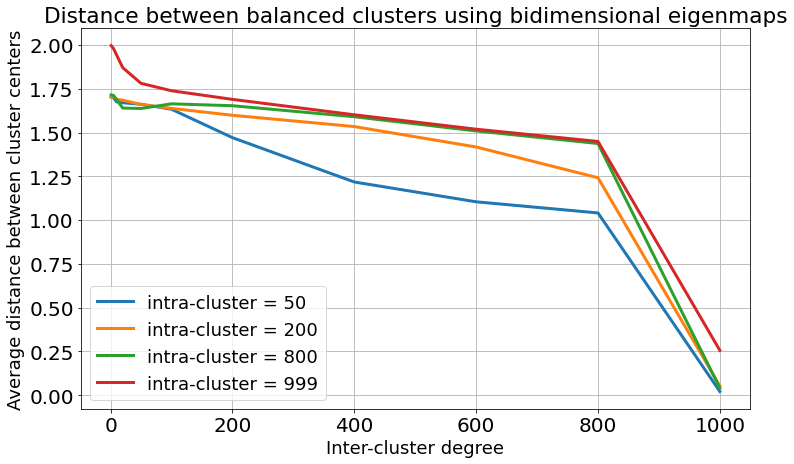

In [9]:
plt.figure(figsize = (12, 7))
plt.rcParams.update({'font.size': 18})
plt.plot(list_between_cluster, all_between[50][2], linewidth = 3, label = "intra-cluster = 50")
plt.plot(list_between_cluster, all_between[200][2], linewidth = 3, label = "intra-cluster = 200")
plt.plot(list_between_cluster, all_between[800][2], linewidth = 3, label = "intra-cluster = 800")
plt.plot(list_between_cluster, all_between[999][2], linewidth = 3, label = "intra-cluster = 999")
plt.tick_params(labelsize = 20)
plt.xlabel("Inter-cluster degree")
plt.ylabel("Average distance between cluster centers")
plt.title("Distance between balanced clusters using bidimensional eigenmaps")
plt.grid()
plt.legend()

plt.savefig("../plots/ad_hoc/_distance_between.png", bbox_inches = 'tight')

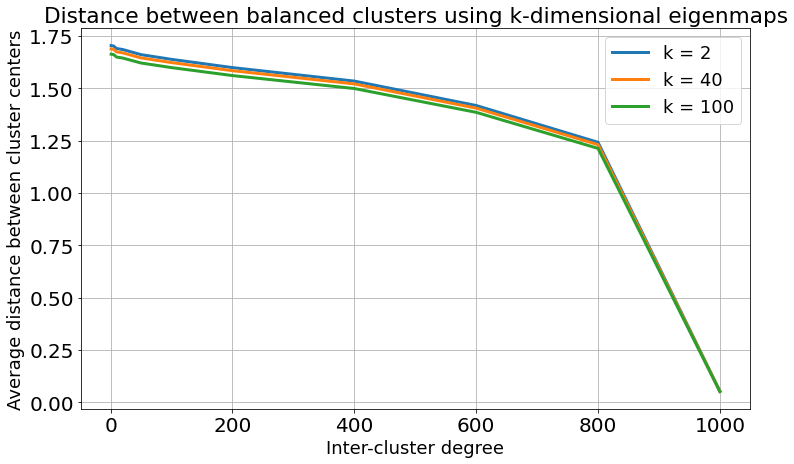

In [11]:
plt.figure(figsize = (12, 7))
plt.plot(list_between_cluster, all_between[200][2], linewidth = 3, label = "k = 2")
plt.plot(list_between_cluster, all_between[200][40], linewidth = 3, label = "k = 40")
plt.plot(list_between_cluster, all_between[200][100], linewidth = 3, label = "k = 100")

plt.tick_params(labelsize = 20)
plt.xlabel("Inter-cluster degree")
plt.ylabel("Average distance between cluster centers")
plt.title("Distance between balanced clusters using k-dimensional eigenmaps")
plt.grid()
plt.legend()

plt.savefig("../plots/ad_hoc/_distance_between_various_k.png", bbox_inches = 'tight')

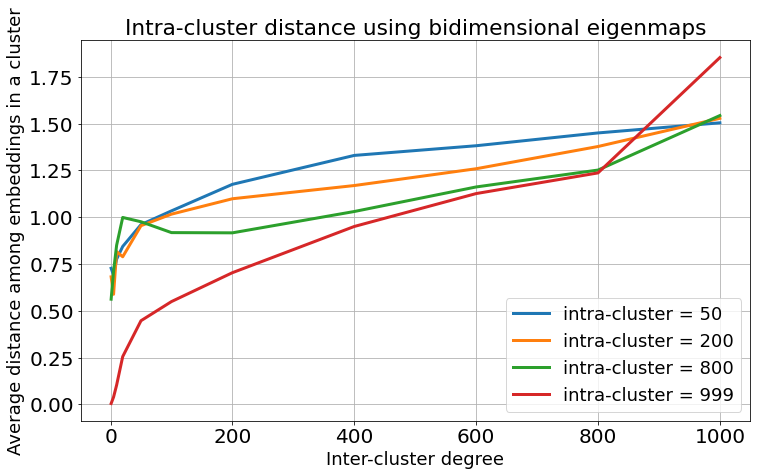

In [12]:
plt.figure(figsize = (12, 7))
plt.rcParams.update({'font.size': 18})
plt.plot(list_between_cluster, np.array(all_cluster1[50][2]) + np.array(all_cluster2[50][2]) / 2, linewidth = 3, label = "intra-cluster = 50")
plt.plot(list_between_cluster, np.array(all_cluster1[200][2]) + np.array(all_cluster2[200][2]) / 2, linewidth = 3, label = "intra-cluster = 200")
plt.plot(list_between_cluster, np.array(all_cluster1[800][2]) + np.array(all_cluster2[800][2]) / 2, linewidth = 3, label = "intra-cluster = 800")
plt.plot(list_between_cluster, np.array(all_cluster1[999][2]) + np.array(all_cluster2[999][2]) / 2, linewidth = 3, label = "intra-cluster = 999")
plt.tick_params(labelsize = 20)
plt.xlabel("Inter-cluster degree")
plt.ylabel("Average distance among embeddings in a cluster")
plt.title("Intra-cluster distance using bidimensional eigenmaps")
plt.grid()
plt.legend()

plt.savefig("../plots/ad_hoc/_distance_inside.png", bbox_inches = 'tight')

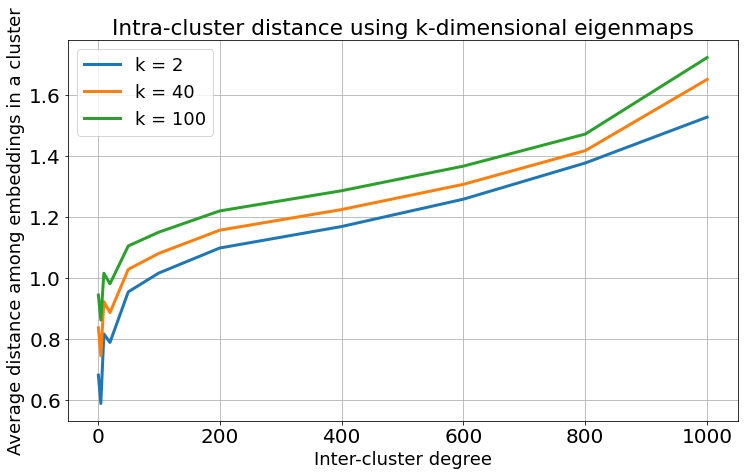

In [13]:
plt.figure(figsize = (12, 7))
plt.rcParams.update({'font.size': 18})
plt.plot(list_between_cluster, np.array(all_cluster1[200][2]) + np.array(all_cluster2[200][2]) / 2, linewidth = 3, label = "k = 2")
plt.plot(list_between_cluster, np.array(all_cluster1[200][40]) + np.array(all_cluster2[200][40]) / 2, linewidth = 3, label = "k = 40")
plt.plot(list_between_cluster, np.array(all_cluster1[200][100]) + np.array(all_cluster2[200][100]) / 2, linewidth = 3, label = "k = 100")
plt.tick_params(labelsize = 20)
plt.xlabel("Inter-cluster degree")
plt.ylabel("Average distance among embeddings in a cluster")
plt.title("Intra-cluster distance using k-dimensional eigenmaps")
plt.grid()
plt.legend()

plt.savefig("../plots/ad_hoc/_distance_inside_various_k.png", bbox_inches = 'tight')

## Pickle the traces

In [82]:
save_pickle = "../pickle/test_graphs/balanced_unweighted/traces.pkl"

with open(save_pickle, 'wb') as f:
    pkl.dump([all_between, all_cluster1, all_cluster2], f)

## Unbalanced clusters

In [14]:
nodes_in_cluster     = 500
p1 = [20, 40, 60]
p2 = [5, 5, 10]
list_cluster_edges   = zip(p1, p2, range(0, len(p1)))
list_between_cluster = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]


all_between  = {}
all_cluster1 = {}
all_cluster2 = {}
        
for n1, n2, index_val in list_cluster_edges:
    
    all_b  = []
    all_c1 = []
    all_c2 = []
    
    for no_in_between_cluster_edges in list_between_cluster:
        
        print("=" * 100)
        print("No edges generated by node in cluster: {}, {}".format(n1, n2))
        print("No of edges drawn by each node in between clusters: {}".format(no_in_between_cluster_edges))
        print("-" * 100)

        k_between  = []
        k_cluster1 = []
        k_cluster2 = []
        
        no_runs = 10
        # run it multiple times and average the data
        for _r in range(0, no_runs):
            print("run no. {} ...".format(_r))

            src = []
            dst = []
            
            for i in range(0, nodes_in_cluster):
                dsts = np.random.choice(np.delete(np.array(range(0, nodes_in_cluster)), i, None), size = n1, replace = False)
                for d in dsts:
                    src.append(i)
                    dst.append(d)

            for j in range(nodes_in_cluster, nodes_in_cluster * 2):
                dsts = np.random.choice(np.delete(np.array(range(nodes_in_cluster, nodes_in_cluster * 2)), j - nodes_in_cluster, None), size = n2, replace = False)
                for d in dsts:
                    src.append(j)
                    dst.append(d)

            inter_cluster_src = np.random.choice(np.array(range(0, nodes_in_cluster)), size = no_in_between_cluster_edges, replace = False)
            for _src in inter_cluster_src:
                inter_cluster_dst = np.random.choice(np.array(range(nodes_in_cluster, nodes_in_cluster * 2)), size = no_in_between_cluster_edges, replace = False)

                for _dst in inter_cluster_dst:
                    src.append(_src)
                    dst.append(_dst)

            # convert the src, dst to a data frame
            df = pd.DataFrame(list(zip(src, dst)), columns = ["src", "dst"])

            # get the eigenvectors
            graph = nx.from_pandas_edgelist(df, "src", "dst")
            laplacian = nx.normalized_laplacian_matrix(graph)
            try:
                eig_vals, eig_vecs = eigsh(laplacian, k = 3, which = "SM")
            except:
                print('tolerance required')
                eig_vals, eig_vecs = eigsh(laplacian, k = 3, which = "SM", tol = 1e-16)


            # get the cluster indexes
            v = []
            cluster1 = []
            cluster2 = []
            idx = 0
            for node in graph.nodes():
                if node < nodes_in_cluster: 
                    v.append('r')
                    cluster1.append(idx)
                else:
                    v.append('b')
                    cluster2.append(idx)

                idx += 1

            # get the distances
            normed = eig_vecs[:, 1:3]
            for iter in range(0, len(normed)):
                n = np.linalg.norm(normed[iter], ord = 2)
                for k_column in range(0, 2):
                    normed[iter][k_column] = normed[iter][k_column] / n

            xa = []
            xb = []
            for iter in range(0, 2):
                xa.append(normed[cluster1, iter].mean())
                xb.append(normed[cluster2, iter].mean())

            xa = np.array(xa).reshape(1, 2)
            xb = np.array(xb).reshape(1, 2)
            k_between.append(cdist(xa, xb)[0][0])
            k_cluster1.append(pdist(normed[cluster1, :]).mean())
            k_cluster2.append(pdist(normed[cluster2, :]).mean())
                
        # get the averages for the 10 runs 
        all_b.append(np.array(k_between).mean())
        all_c1.append(np.array(k_cluster1).mean())
        all_c2.append(np.array(k_cluster2).mean())
            
    # get the values into the dict of cluster node numbers
    all_between[index_val]  = all_b
    all_cluster1[index_val] = all_c1
    all_cluster2[index_val] = all_c2

No edges generated by node in cluster: 20, 5
No of edges drawn by each node in between clusters: 5
----------------------------------------------------------------------------------------------------
run no. 0 ...
run no. 1 ...
run no. 2 ...
run no. 3 ...
run no. 4 ...
run no. 5 ...
run no. 6 ...
run no. 7 ...
run no. 8 ...
run no. 9 ...
No edges generated by node in cluster: 20, 5
No of edges drawn by each node in between clusters: 10
----------------------------------------------------------------------------------------------------
run no. 0 ...
run no. 1 ...
run no. 2 ...
run no. 3 ...
run no. 4 ...
run no. 5 ...
run no. 6 ...
run no. 7 ...
run no. 8 ...
run no. 9 ...
No edges generated by node in cluster: 20, 5
No of edges drawn by each node in between clusters: 15
----------------------------------------------------------------------------------------------------
run no. 0 ...
run no. 1 ...
run no. 2 ...
run no. 3 ...
run no. 4 ...
run no. 5 ...
run no. 6 ...
run no. 7 ...
run no

run no. 1 ...
run no. 2 ...
run no. 3 ...
run no. 4 ...
run no. 5 ...
run no. 6 ...
run no. 7 ...
run no. 8 ...
run no. 9 ...
No edges generated by node in cluster: 40, 5
No of edges drawn by each node in between clusters: 50
----------------------------------------------------------------------------------------------------
run no. 0 ...
run no. 1 ...
run no. 2 ...
run no. 3 ...
run no. 4 ...
run no. 5 ...
run no. 6 ...
run no. 7 ...
run no. 8 ...
run no. 9 ...
No edges generated by node in cluster: 60, 10
No of edges drawn by each node in between clusters: 5
----------------------------------------------------------------------------------------------------
run no. 0 ...
run no. 1 ...
run no. 2 ...
run no. 3 ...
run no. 4 ...
run no. 5 ...
run no. 6 ...
run no. 7 ...
run no. 8 ...
run no. 9 ...
No edges generated by node in cluster: 60, 10
No of edges drawn by each node in between clusters: 10
-------------------------------------------------------------------------------------------

## Plot some traces

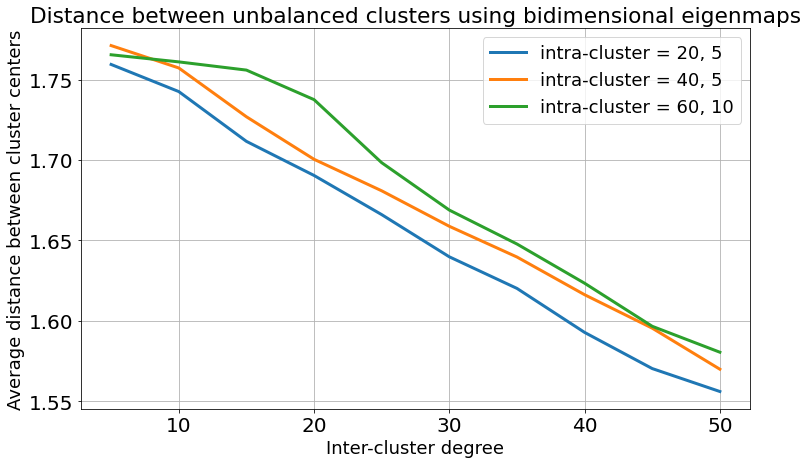

In [16]:
plt.figure(figsize = (12, 7))
plt.rcParams.update({'font.size': 18})
plt.plot(list_between_cluster, all_between[0], linewidth = 3, label = "intra-cluster = 20, 5")
plt.plot(list_between_cluster, all_between[1], linewidth = 3, label = "intra-cluster = 40, 5")
plt.plot(list_between_cluster, all_between[2], linewidth = 3, label = "intra-cluster = 60, 10")

plt.tick_params(labelsize = 20)
plt.xlabel("Inter-cluster degree")
plt.ylabel("Average distance between cluster centers")
plt.title("Distance between unbalanced clusters using bidimensional eigenmaps")
plt.grid()
plt.legend()

plt.savefig("../plots/ad_hoc/_distance_between_unbalanced.png", bbox_inches = 'tight')

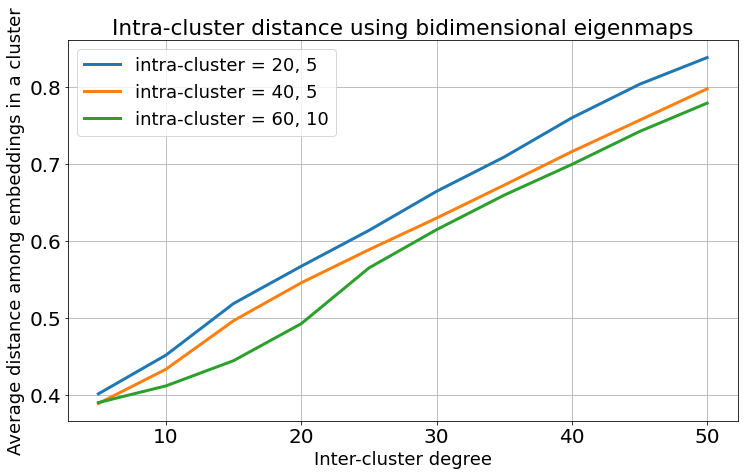

In [17]:
plt.figure(figsize = (12, 7))
plt.rcParams.update({'font.size': 18})
plt.plot(list_between_cluster, np.array(all_cluster1[0]) + np.array(all_cluster2[0]) / 2, linewidth = 3, label = "intra-cluster = 20, 5")
plt.plot(list_between_cluster, np.array(all_cluster1[1]) + np.array(all_cluster2[1]) / 2, linewidth = 3, label = "intra-cluster = 40, 5")
plt.plot(list_between_cluster, np.array(all_cluster1[2]) + np.array(all_cluster2[2]) / 2, linewidth = 3, label = "intra-cluster = 60, 10")
plt.tick_params(labelsize = 20)
plt.xlabel("Inter-cluster degree")
plt.ylabel("Average distance among embeddings in a cluster")
plt.title("Intra-cluster distance using bidimensional eigenmaps")
plt.grid()
plt.legend()

plt.savefig("../plots/ad_hoc/_distance_inside_unbalanced.png", bbox_inches = 'tight')